In [2]:
from fastcore.all import *
import time
import re

def search_images(term, max_size=4000): 
    url = 'https://duckduckgo.com/'
    res = urlread(url, data={'q':term})
    pattern = re.search(r'vqd=([\d-]+)\&', res)
    params = {'vqd' : pattern.group(1), 'p': '1', 'o':'json', 'q':term}
    urls, next = set(), ''
    req = url + 'i.js'
    while len(urls) < max_size and next is not None :
        json = urljson(req, data=params)
        urls.update( L(json["results"]).itemgot('image'))
        next =  json["next"] if "next" in json else None
        req = url + str(next)
        time.sleep(1)
    return L(urls)[:max_size]


In [ ]:
from fastai.vision.all import *

search = 'bmw car', 'mercedes car'
path = Path('mercedes_or_bmw')
path2 = Path('mercedes_or_bmw2')

for term in search : 
    (path/term).mkdir(parents=true, exist_ok=true)
    download_images(path/term, urls=search_images(f'{term} photo'))
    resize_images(path/term, dest=path2/term, max_size=400)

In [11]:
failed = verify_images(get_image_files(path2))
failed.map(Path.unlink)
print(len(failed))

0


In [14]:
ls -al mercedes_or_bmw2/bmw\ car


total 33479
drwxr-xr-x 2 root root   1637 Jul 30 14:38 ./
drwxr-xr-x 4 root root      2 Jul 30 13:27 ../
-rw-r--r-- 1 root root  23028 Jul 30 14:37 002e6b48-9516-4017-abe5-c5a36fa10705.jpg
-rw-r--r-- 1 root root  18933 Jul 30 14:37 00479190-54bd-4205-a339-930f2294f80d.jpg
-rw-r--r-- 1 root root  19107 Jul 30 14:37 00570d77-79ff-45d4-a923-9a73fb2602f8.jpeg
-rw-r--r-- 1 root root  18280 Jul 30 14:37 005863a1-6330-485a-ae22-03c53b271950.jpg
-rw-r--r-- 1 root root  16892 Jul 30 14:37 006bab92-9647-426b-a02b-6327bf3494d0.jpg
-rw-r--r-- 1 root root   9095 Jul 30 14:37 007fa2ab-99b2-42c2-9103-d4d327f96ce0.jpg
-rw-r--r-- 1 root root  20906 Jul 30 14:37 0086876b-edc9-4afa-8f1e-fa2b6f97f8be.jpg
-rw-r--r-- 1 root root  14128 Jul 30 14:37 00e3487a-0403-49b3-8286-762d62ac104f.jpg
-rw-r--r-- 1 root root 144102 Jul 30 14:37 00eb8852-5478-4ec8-9ac8-35470cf66900.png
-rw-r--r-- 1 root root  12160 Jul 30 14:37 00f971ca-8e41-4261-a0d8-036f3aaf2276.jpg
-rw-r--r-- 1 root root  31440 Jul 30 14:37 012b2fdb-86

In [20]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]).dataloaders(path2)

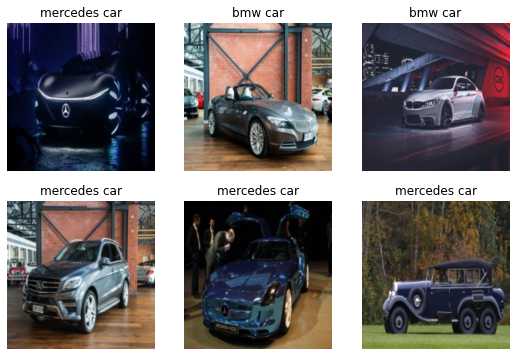

In [21]:
dls.show_batch(max_n=6)

In [22]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.027451,0.696698,0.293939,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.636775,0.375072,0.151515,00:15
1,0.313512,0.296021,0.100000,00:15
2,0.162362,0.285573,0.086364,00:15


In [23]:
category,_,probs = learn.predict(PILImage.create('images/bmw-750.jpeg'))
print(f"This is a: {category}")
print(f"Probability it's a {category}: {probs[0]:.4f}, {probs[1]:.4f}")

This is a: bmw car
Probability it's a bmw car: 0.7501, 0.2499


In [63]:
ls

09b_vision.utils.ipynb  images/         mercedes_or_bmw/
course22/               lesson_1.ipynb  mercedes_or_bmw2/


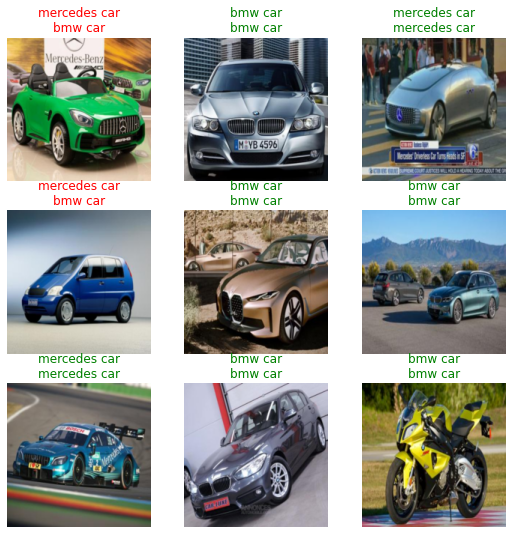

In [24]:
learn.show_results()
